In [ ]:
###macro to compare the analyical and AI pipeline on experimental data

In [3]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import functions
import root_function

In [6]:
ly_hit_x,x_hit,zx_hit,dx_hit,pex_hit=functions.read_root_viewx("/lustrehome/federicacuna/TB_Sept_2023_ml/root_file_predhit/pred_EXPdata_xz_sage_conv.root")

5000
no good event  448
no good event  500
no good event  526
no good event  607
no good event  715
no good event  841
no good event  929
no good event  1146
no good event  1193
no good event  1314
no good event  1789
no good event  2224
no good event  2313
no good event  2314
no good event  2692
no good event  3139
no good event  3197
no good event  3740
no good event  3819
no good event  3964
no good event  4076
no good event  4113
no good event  4430
no good event  4555
no good event  4817
no good event  4829
no good event  4957
4973


In [7]:
ly_hit_y,y_hit,zy_hit,dy_hit,pey_hit=functions.read_root_viewy("/lustrehome/federicacuna/TB_Sept_2023_ml/root_file_predhit/pred_EXPdata_yz_sageconv.root")

5000
no good event y  575
no good event y  1054
no good event y  1279
no good event y  1900
no good event y  2224
no good event y  2390
no good event y  2395
no good event y  2782
no good event y  2844
no good event y  2846
no good event y  2926
no good event y  3388
no good event y  3413
no good event y  3679
no good event y  3740
no good event y  4221
no good event y  4430
no good event y  4817
4982


In [8]:
####reading the root file from traditional track finding/fitting pipeline (Loparco)
file_trad = ROOT.TFile("/lustrehome/federicacuna/TestBeam_T10_2023/outresults_root/Analysis_v1.3_20230910_055858_Aligned.root", "READ")
tree = file_trad.Get("tree")
n_ev=tree.GetEntries()
ax_ev_trad=[]
bx_ev_trad=[]
ay_ev_trad=[]
by_ev_trad=[]
x_orig=[]
y_orig=[]
zx_orig=[]
zy_orig=[]
dx_orig=[]
cz_trad=[]
cx_trad=[]
cy_trad=[]
chi_x_trad=[]
chi_y_trad=[]
dy_orig=[]
n_ev=5000
for i in range(n_ev):
    tree.GetEntry(i)
    # if i not in (no_good_ev_vec): 
    x_orig.append([])
    y_orig.append([])
    zx_orig.append([])
    zy_orig.append([])
    dy_orig.append([])
    dx_orig.append([])

    ievent=tree.ievent
    nclux=tree.nclux
    ncluy=tree.ncluy
    chi_x_trad.append(tree.chi2x)
    chi_y_trad.append(tree.chi2y)
    cz_trad.append(tree.cz)
    cx_trad.append(tree.cx)
    cy_trad.append(tree.cy)
    ax_ev_trad.append(tree.ax)
    bx_ev_trad.append(tree.bx)
    ay_ev_trad.append(tree.ay)
    by_ev_trad.append(tree.by)

    for j in range(nclux):
        x_orig[-1].append(tree.xclux[j])        
        zx_orig[-1].append(tree.zclux[j])
        dx_orig[-1].append(tree.dxclux[j])
          
    for k in range(ncluy):
        y_orig[-1].append(tree.ycluy[k])        
        zy_orig[-1].append(tree.zcluy[k])
        dy_orig[-1].append(tree.dycluy[k])

In [9]:
ax_ev=[]
bx_ev=[]
ay_ev=[]
by_ev=[]

ax_ev,bx_ev=functions.linear_fit(len(ly_hit_x),x_hit,zx_hit,dx_hit)

ay_ev,by_ev=functions.linear_fit(len(ly_hit_y),y_hit,zy_hit,dy_hit)
   

/tmp/ipykernel_3781/3814364200.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(zx_orig[i], x_orig[i], xerr=0,yerr=dx_orig[i],marker='o',fmt='o',ecolor='black',color='grey',label='data point')


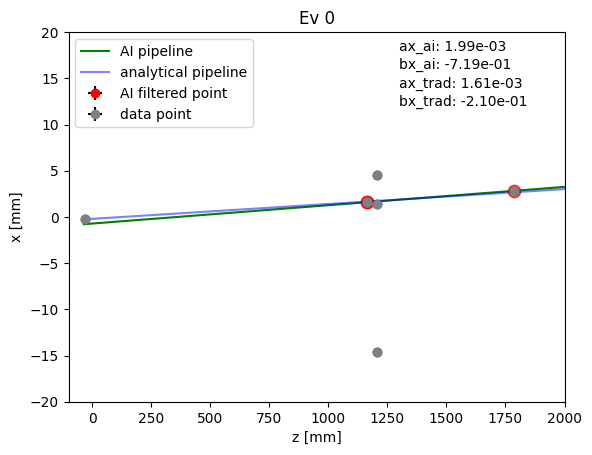

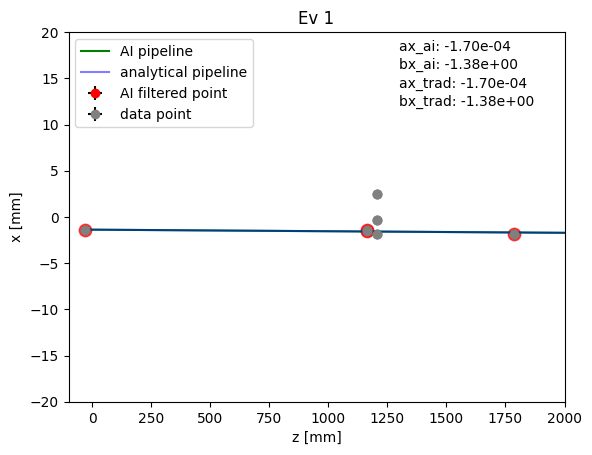

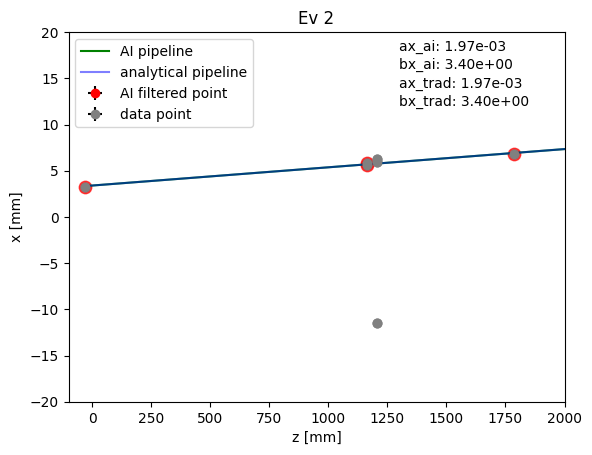

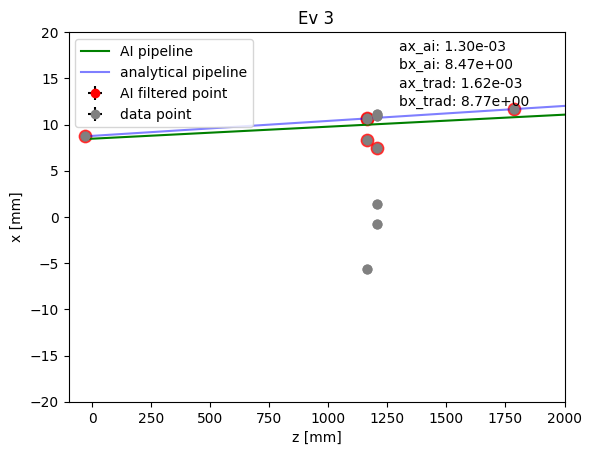

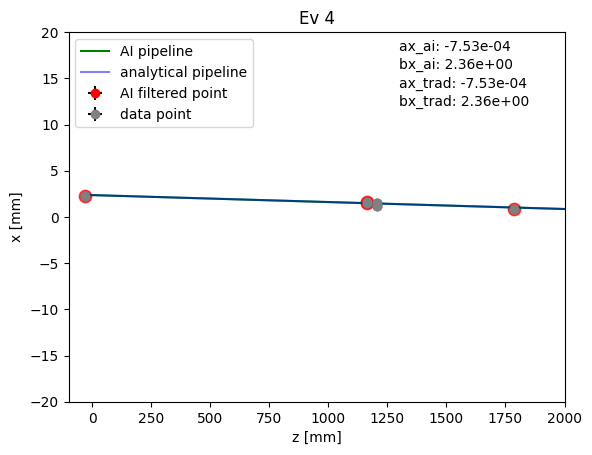

/tmp/ipykernel_3781/3814364200.py:73: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(zy_orig[i], y_orig[i], xerr=0,yerr=dy_orig[i],marker='o',fmt='o',ecolor='black',color='grey',label='data point')


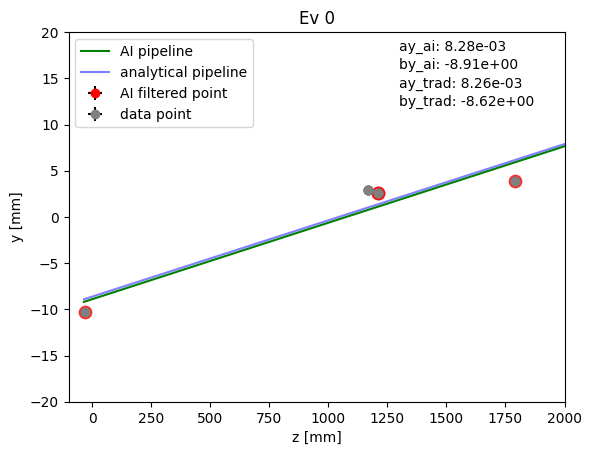

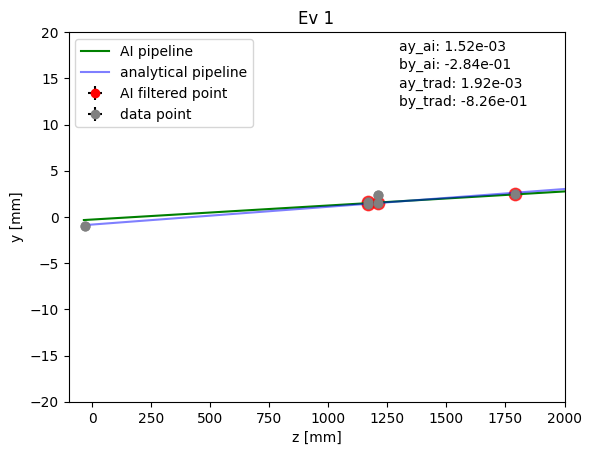

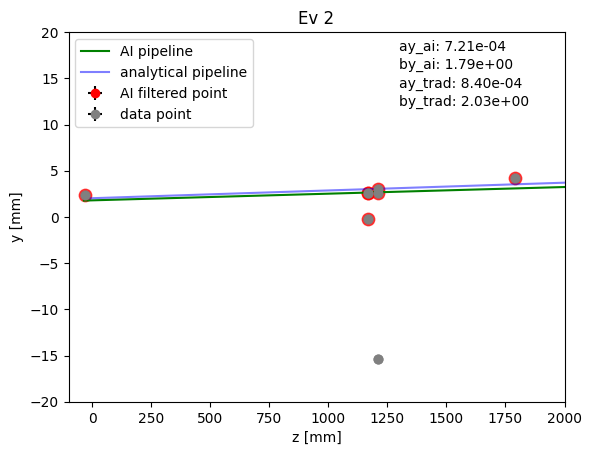

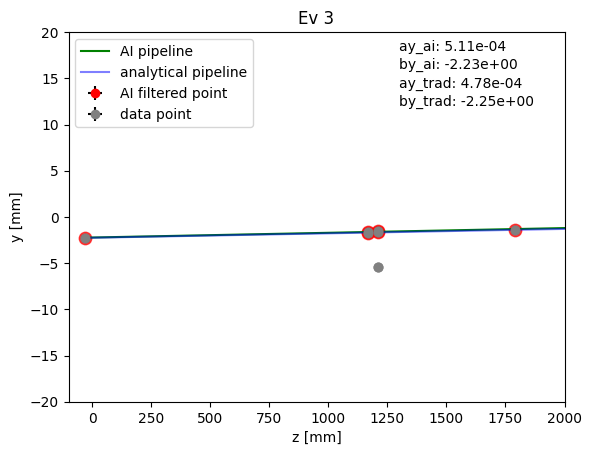

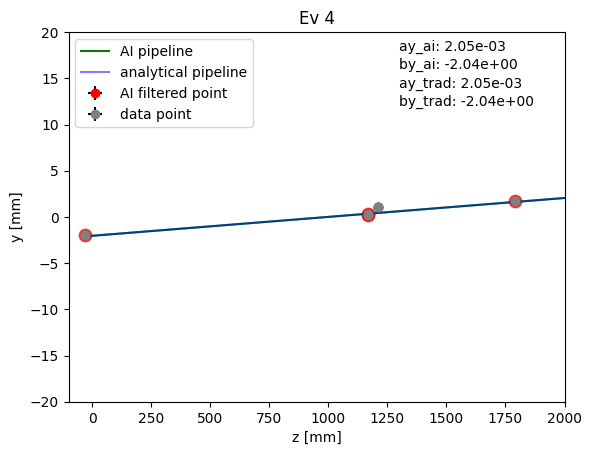

In [10]:
###plot comparison with exp data
start_Ev=0
stop_Ev=5

chi2x_ev=[]
for i in range(0,len(ax_ev)):
    chi2=0.0
    for j in range(0,len(x_hit[i])):
        chi2 += ROOT.TMath.Power((x_hit[i][j] - ax_ev[i] * zx_hit[i][j]- bx_ev[i]) / dx_hit[i][j], 2)
        # print(dx_hit[i][j])
    # print(chi2)
    # chi2/=(len(det_ev)-2)   
    chi2x_ev.append(chi2)   


z= np.linspace(-35, 2000, 4)  
z_trad=np.linspace(-35, 2000, 4)  

for i in range(start_Ev,stop_Ev): # 
    # if i not in no_good_events:
    # if(chi2_ev[i]>10):
    plt.scatter(zx_hit[i],x_hit[i],color='red',s=80,alpha=0.7) 
    plt.scatter(zx_orig[i],x_orig[i],color='grey',s=40) 
    plt.errorbar(zx_hit[i], x_hit[i], xerr=0,yerr=dx_hit[i],fmt='o',ecolor='black',color='red',label='AI filtered point',)
    plt.errorbar(zx_orig[i], x_orig[i], xerr=0,yerr=dx_orig[i],marker='o',fmt='o',ecolor='black',color='grey',label='data point')

    plt.ylim(-20,20) 
    plt.xlim(-100,2000)
    x=ax_ev[i]*z+bx_ev[i] 
    x_trad=ax_ev_trad[i]*z_trad+bx_ev_trad[i] 
    plt.plot(z, x,label='AI pipeline',color='green',marker=None) 
    plt.plot(z_trad, x_trad, label='analytical pipeline',color='blue',marker=None,alpha=0.5) 
    plt.ylim(-20,20) 
    ax_rounded = '{:.2e}'.format(ax_ev[i])
    bx_rounded = '{:.2e}'.format(bx_ev[i])
    ax_rounded_trad = '{:.2e}'.format(ax_ev_trad[i])
    bx_rounded_trad = '{:.2e}'.format(bx_ev_trad[i])
    plt.ylabel('x [mm]') 
    plt.xlabel('z [mm]') 
    plt.text( 1300,18,f'ax_ai: {ax_rounded}', fontsize=10)
    plt.text(1300, 16, f'bx_ai: {bx_rounded}', fontsize=10) 
    plt.text( 1300,14,f'ax_trad: {ax_rounded_trad}', fontsize=10)
    plt.text(1300, 12, f'bx_trad: {bx_rounded_trad}', fontsize=10)         
    plt.legend(loc='upper left')
    # plt.xlim(-100,2000) 
    # plt.ylim(-20,20) 
    plt.title(f'Ev {i}') 
    # print(dx_hit[i]) 
    # print(x_hit[i]) 
     # Rimuovi la linea che unisce i punti
    
    plt.xlim(-100,2000) 
    plt.ylim(-20,20)           
    # plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/comparison_pipeline_ev_xz{i}.png')      
    plt.show()

chi2y_ev=[]
for i in range(0,len(ay_ev)):
    chi2=0.0
    for j in range(0,len(y_hit[i])):
        chi2 += ROOT.TMath.Power((y_hit[i][j] - ay_ev[i] * zy_hit[i][j]- by_ev[i]) / dy_hit[i][j], 2);
    # chi2/=(len(det_ev)-2)

    chi2y_ev.append(chi2)

z= np.linspace(-35, 2000, 4)  
z_trad=np.linspace(-35, 2000, 4)  
for i in range(start_Ev,stop_Ev): # 
    # if(chi2_ev[i]>10):
    plt.scatter(zy_hit[i],y_hit[i],color='red',s=80,alpha=0.7) 
    plt.scatter(zy_orig[i],y_orig[i],color='grey',s=40) 
    plt.errorbar(zy_hit[i], y_hit[i], xerr=0,yerr=dy_hit[i],fmt='o',ecolor='black',color='red',label='AI filtered point',)
    plt.errorbar(zy_orig[i], y_orig[i], xerr=0,yerr=dy_orig[i],marker='o',fmt='o',ecolor='black',color='grey',label='data point')

    plt.ylim(-20,20) 
    plt.xlim(-100,2000)
    y=ay_ev[i]*z+by_ev[i] 
    y_trad=ay_ev_trad[i]*z_trad+by_ev_trad[i] 
    plt.plot(z, y,label='AI pipeline',color='green',marker=None) 
    plt.plot(z_trad, y_trad, label='analytical pipeline',color='blue',marker=None,alpha=0.5) 
    plt.ylim(-20,20) 
    ay_rounded = '{:.2e}'.format(ay_ev[i])
    by_rounded = '{:.2e}'.format(by_ev[i])
    ay_rounded_trad = '{:.2e}'.format(ay_ev_trad[i])
    by_rounded_trad = '{:.2e}'.format(by_ev_trad[i])
    plt.ylabel('y [mm]') 
    plt.xlabel('z [mm]') 
    plt.text( 1300,18,f'ay_ai: {ay_rounded}', fontsize=10)
    plt.text(1300, 16, f'by_ai: {by_rounded}', fontsize=10) 
    plt.text( 1300,14,f'ay_trad: {ay_rounded_trad}', fontsize=10)
    plt.text(1300, 12, f'by_trad: {by_rounded_trad}', fontsize=10)         
    plt.legend(loc='upper left')
    # plt.xlim(-100,2000) 
    # plt.ylim(-20,20) 
    plt.title(f'Ev {i}') 
    # print(dx_hit[i]) 
    # print(x_hit[i]) 
     # Rimuovi la linea che unisce i punti
    
    plt.xlim(-100,2000) 
    plt.ylim(-20,20)
    # plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/comparison_pipeline_ev_yz{i}.png')      
    plt.show()

Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/chi2x_exp.png has been created
Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/chi2y_exp.png has been created


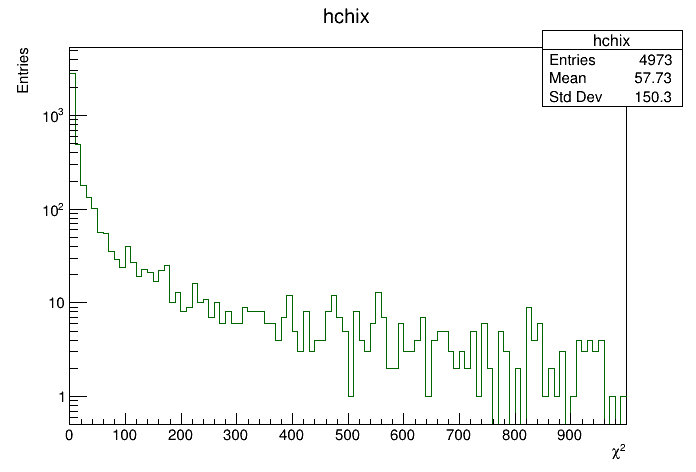

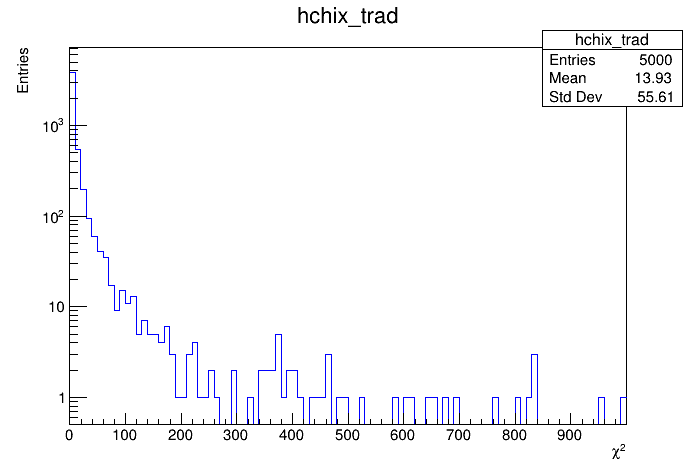

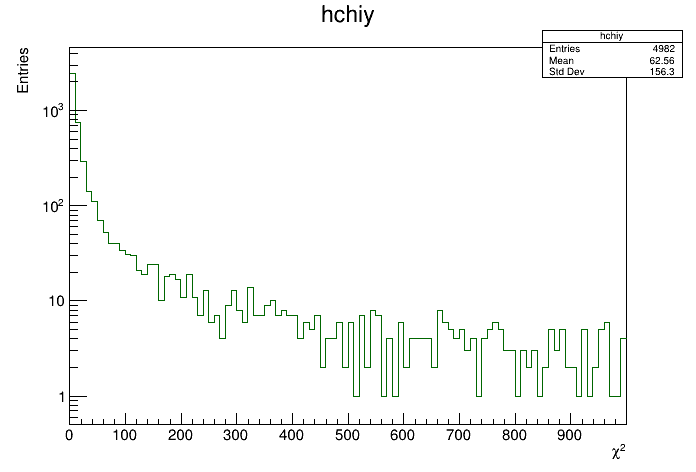

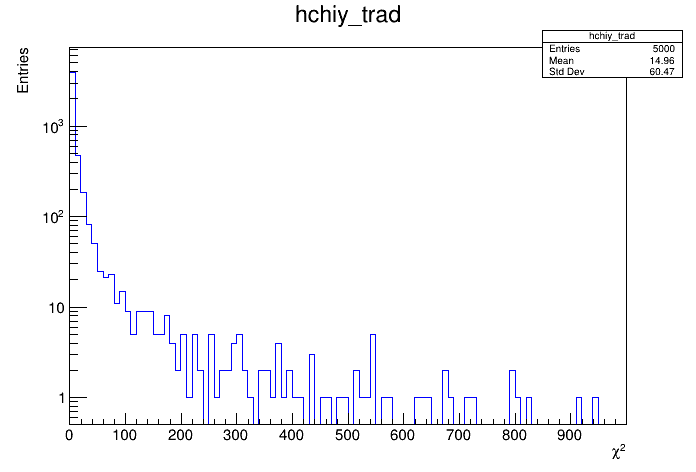

In [11]:

hchix=ROOT.TH1F("hchix","hchix",100,-0.5,999.5)
hchix.GetYaxis().SetTitle("Entries")
hchix.GetXaxis().SetTitle("#chi^{2}")
hchix.SetLineColor(ROOT.kGreen+3)
hchix.SetMarkerColor(ROOT.kGreen+3)
hchix_trad=ROOT.TH1F("hchix_trad","hchix_trad",100,-0.5,999.5)
hchix_trad.GetYaxis().SetTitle("Entries")
hchix_trad.GetXaxis().SetTitle("#chi^{2}")
hchix_trad.SetLineColor(4)
hchix_trad.SetMarkerColor(4)

for i in range(0,len(chi_x_trad)):
    hchix_trad.Fill(chi_x_trad[i])
for i in range(0,len(chi2x_ev)):
    hchix.Fill(chi2x_ev[i])

cchi=ROOT.TCanvas("cchi","cchi")
cchi.cd()
cchi.SetLogy()
hchix.Draw()
cchi_trad=ROOT.TCanvas("cchi_trad","cchi_trad")
cchi_trad.cd()
cchi_trad.SetLogy()
hchix_trad.Draw("")
cchi.Draw()
cchi_trad.Draw()
dict_chix={'hchix':hchix,'hchix_trad':hchix_trad}
root_function.draw_mult_stack(dict_chix,'#chi^{2} distribution in xz view',img_name='chi2x_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')

# cchi_trad.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/chi2x_trad.png') 
# cchi.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/chi_x.png') 
    

hchiy=ROOT.TH1F("hchiy","hchiy",100,-0.5,999.5)
hchiy.GetYaxis().SetTitle("Entries")
hchiy.GetXaxis().SetTitle("#chi^{2}")
hchiy.SetMarkerColor(ROOT.kGreen+3)
hchiy.SetLineColor(ROOT.kGreen+3)
hchiy_trad=ROOT.TH1F("hchiy_trad","hchiy_trad",100,-0.5,999.5)
hchiy_trad.GetYaxis().SetTitle("Entries")
hchiy_trad.GetXaxis().SetTitle("#chi^{2}")
hchiy_trad.SetMarkerColor(4)
hchiy_trad.SetLineColor(4)
for i in range(0,len(chi_y_trad)):
    hchiy_trad.Fill(chi_y_trad[i])
for i in range(0,len(chi2y_ev)):
    hchiy.Fill(chi2y_ev[i])

cchiy=ROOT.TCanvas("cchiy","cchiy")
cchiy.cd()
cchiy.SetLogy()
hchiy.Draw()
cchiy_trad=ROOT.TCanvas("cchiy_trad","cchiy_trad")
cchiy_trad.cd()
cchiy_trad.SetLogy()

hchiy_trad.Draw("")
cchiy.Draw()
cchiy_trad.Draw()
dict_chiy={'hchiy':hchiy,'hchiy_trad':hchiy_trad}
root_function.draw_mult_stack(dict_chiy,'#chi^{2} distribution in yz view',img_name='chi2y_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')

# cchiy_trad.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/chi2y_trad.png') 
# cchiy.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/chi_y.png') 

Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/ax_exp.png has been created
Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/bx_exp.png has been created
Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/ay_exp.png has been created
Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/by_exp.png has been created


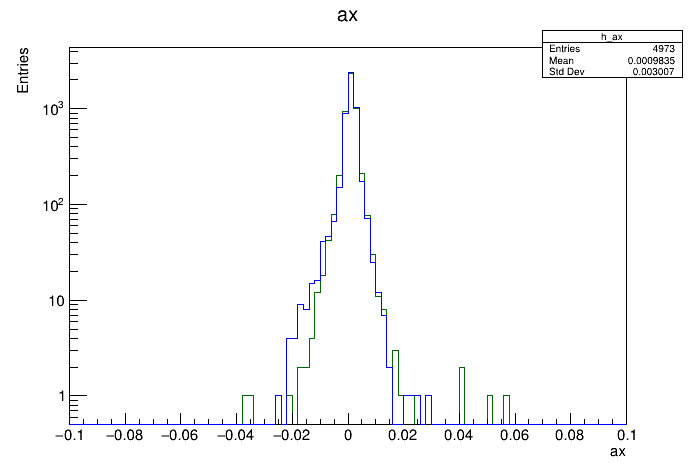

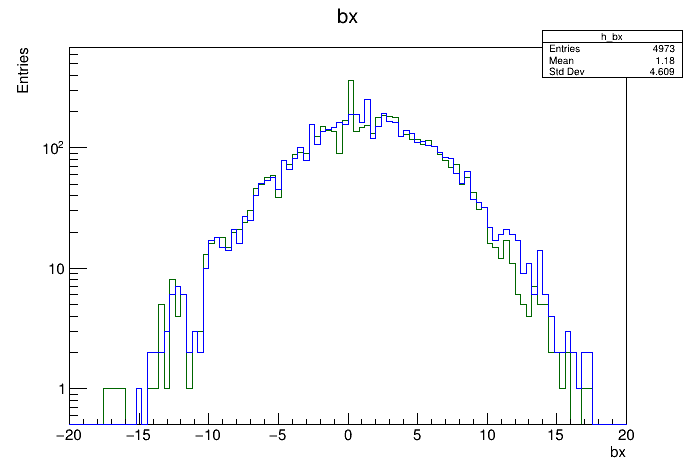

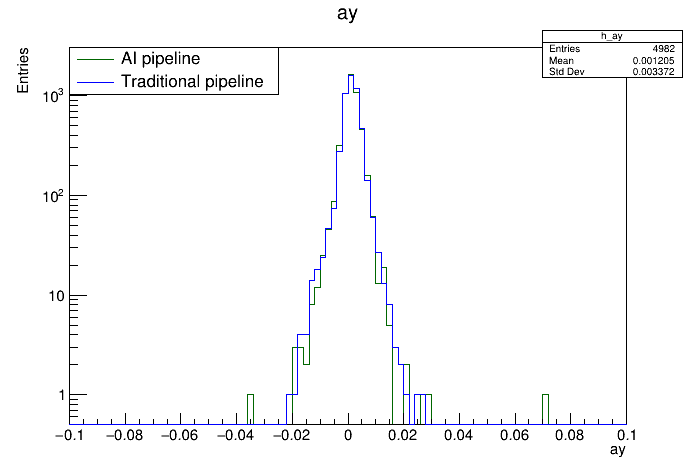

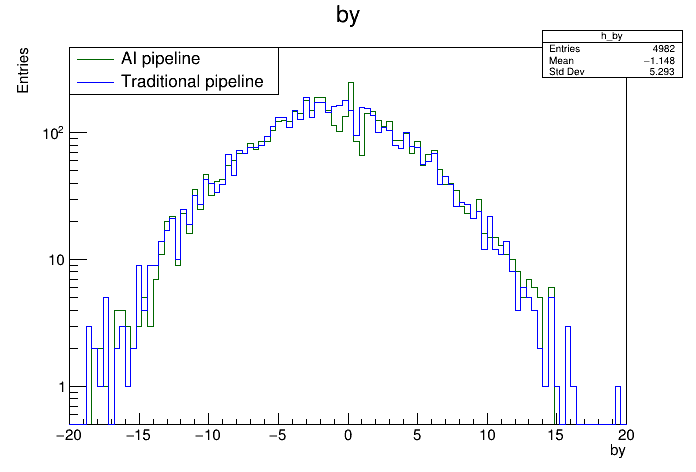

In [14]:

h_ax=ROOT.TH1F("h_ax","ax",100,-0.1,0.1)
h_ax_trad=ROOT.TH1F("h_ax_trad","h_ax_trad",100,-0.1,0.1)
h_ax.GetXaxis().SetTitle('ax')
h_ax.GetYaxis().SetTitle('Entries')
for i in ax_ev:
    h_ax.Fill(i)
for i in ax_ev_trad:
    h_ax_trad.Fill(i)
c_ax=ROOT.TCanvas("c_ax","c_ax")  
c_ax.SetLogy()
c_ax.cd()
h_ax.Draw()
h_ax.SetLineColor(ROOT.kGreen+3)
h_ax.SetMarkerColor(ROOT.kGreen+3)
h_ax_trad.SetLineColor(4)
h_ax_trad.SetMarkerColor(4)
h_ax_trad.Draw("SAME")
h_ax_trad.Draw("SAME")  
legend = ROOT.TLegend(0.1, 0.9, 0.4, 0.8)
legend.AddEntry(h_ax, "AI pipeline", "l")
legend.AddEntry(h_ax_trad, "Traditional pipeline", "l")
legend.Draw()
c_ax.Draw()

dict_ax={'h_ax':h_ax,'h_ax_trad':h_ax_trad}
root_function.draw_mult_stack(dict_ax,'Angular coefficient distribution in xz view',img_name='ax_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')


h_bx=ROOT.TH1F("h_bx","bx",100,-20,20)
h_bx_trad=ROOT.TH1F("h_bx_trad","h_bx_trad",100,-20,20)
h_bx.GetXaxis().SetTitle('bx')
h_bx.GetYaxis().SetTitle('Entries')
h_bx.SetLineColor(ROOT.kGreen+3)
h_bx.SetMarkerColor(ROOT.kGreen+3)
for i in range(0,len(bx_ev)):
    h_bx.Fill(bx_ev[i])
for j in range(len(bx_ev_trad)):
    h_bx_trad.Fill(bx_ev_trad[j])
c_bx=ROOT.TCanvas("c_bx","c_bx")    
c_bx.SetLogy()
c_bx.cd()
h_bx.Draw()
h_bx_trad.SetLineColor(4)
h_bx_trad.SetMarkerColor(4)
h_bx_trad.Draw("SAME")
legend1 = ROOT.TLegend(0.1, 0.9, 0.4, 0.8)
legend1.AddEntry(h_bx, "AI pipeline", "l")
legend1.AddEntry(h_bx_trad, "Traditional pipeline", "l")
legend1.Draw()
c_bx.Draw()
dict_bx={'h_bx':h_bx,'h_bx_trad':h_bx_trad}
root_function.draw_mult_stack(dict_bx,'Intercept distribution in xz view',img_name='bx_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')

# c_ax.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/c_ax.png') 
# c_bx.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/c_bx.png') 

    

h_ay=ROOT.TH1F("h_ay","ay",100,-0.1,0.1)
h_ay_trad=ROOT.TH1F("h_ay_trad","h_ay_trad",100,-0.1,0.1)
h_ay.GetXaxis().SetTitle('ay')
h_ay.GetYaxis().SetTitle('Entries')
h_ay.SetLineColor(ROOT.kGreen+3)
h_ay.SetMarkerColor(ROOT.kGreen+3)
for i in ay_ev:
    h_ay.Fill(i)
for i in ay_ev_trad:
    h_ay_trad.Fill(i)
c_ay=ROOT.TCanvas("c_ay","c_ay")  
c_ay.SetLogy()
c_ay.cd()
h_ay.Draw()
h_ay_trad.SetLineColor(4)
h_ay_trad.SetMarkerColor(4)
h_ay_trad.Draw("SAME")
h_ay_trad.Draw("SAME")  
legend = ROOT.TLegend(0.1, 0.9, 0.4, 0.8)
legend.AddEntry(h_ay, "AI pipeline", "l")
legend.AddEntry(h_ay_trad, "Traditional pipeline", "l")
legend.Draw()
c_ay.Draw()
dict_ay={'h_ay':h_ay,'h_ay_trad':h_ay_trad}
root_function.draw_mult_stack(dict_ay,'Angular coefficient distribution in yz view',img_name='ay_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')
   
h_by=ROOT.TH1F("h_by","by",100,-20,20)
h_by_trad=ROOT.TH1F("h_by_trad","h_by_trad",100,-20,20)
h_by.GetXaxis().SetTitle('by')
h_by.GetYaxis().SetTitle('Entries')
h_by.SetLineColor(ROOT.kGreen+3)
h_by.SetMarkerColor(ROOT.kGreen+3)

for i in range(0,len(by_ev)):
    h_by.Fill(by_ev[i])
for j in range(len(by_ev_trad)):
    h_by_trad.Fill(by_ev_trad[j])
c_by=ROOT.TCanvas("c_by","c_by")    
c_by.SetLogy()
c_by.cd()
h_by.Draw()
h_by_trad.SetLineColor(4)
h_by_trad.SetMarkerColor(4)
legend1 = ROOT.TLegend(0.1, 0.9, 0.4, 0.8)
legend1.AddEntry(h_by, "AI pipeline", "l")
legend1.AddEntry(h_by_trad, "Traditional pipeline", "l")
legend1.Draw()
h_by_trad.Draw("SAME")
c_by.Draw()
dict_by={'h_by':h_by,'h_by_trad':h_by_trad}
root_function.draw_mult_stack(dict_by,'Intercept distribution in yz view',img_name='by_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')

# c_ay.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/c_ay.png') 
# c_by.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/c_by.png') 


In [15]:
crx_trad=[]
cry_trad=[]
crz_trad=[]
for i in range(len(ax_ev_trad)):    
    crx_tr,cry_tr,crz_tr=(functions.evaluateRecoCosineDirector(ax_ev_trad[i],ay_ev_trad[i]))                         
    crx_trad.append(crx_tr)
    cry_trad.append(cry_tr)
    crz_trad.append(crz_tr)
    
crx=[]
cry=[]
crz=[]
for i in range(len(ax_ev)):
    crx_,cry_,crz_=(functions.evaluateRecoCosineDirector(ax_ev[i],ay_ev[i]))
    crx.append(crx_)
    cry.append(cry_)
    crz.append(crz_)

Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/cx.png has been created
Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/cy.png has been created
Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/cz.png has been created


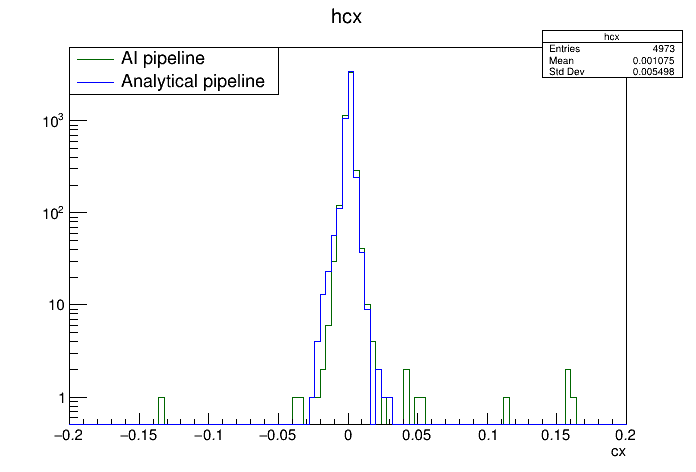

In [16]:
hcx=ROOT.TH1F("hcx","hcx",100,-0.2,0.2)
hcx.SetLineColor(ROOT.kGreen+3)
hcx.SetMarkerColor(ROOT.kGreen+3)
hcx.GetXaxis().SetTitle("cx")

hcx_trad=ROOT.TH1F("hcx_trad","hcx_trad",100,-0.2,0.2)
hcx_trad.SetMarkerColor(4)
hcx_trad.SetLineColor(4)


hcy=ROOT.TH1F("hcy","hcy",100,-0.2,0.2)
hcy.SetLineColor(ROOT.kGreen+3)
hcy.SetMarkerColor(ROOT.kGreen+3)
hcy.GetXaxis().SetTitle("cy")

hcy_trad=ROOT.TH1F("hcy_trad","hcy_trad",100,-0.2,0.2)
hcy_trad.SetLineColor(4)
hcy_trad.SetMarkerColor(4)


hcz=ROOT.TH1F("hcz","hcz",100,0.9996,1.0001)
hcy.GetXaxis().SetTitle("cz")
hcz.SetLineColor(ROOT.kGreen+3)
hcz.SetMarkerColor(ROOT.kGreen+3)

hcz_trad=ROOT.TH1F("hcz_trad","hcz_trad",100,0.9996,1.0001)
hcz_trad.SetLineColor(4)
hcz_trad.SetMarkerColor(4)


for j in range(len(crx)):
    hcx.Fill(crx[j])
    
for i in range(len(crx_trad)):
    hcx_trad.Fill(crx_trad[i])

for j in range(len(cry)):
     hcy.Fill(cry[j])

for i in range(len(cry_trad)):  
    hcy_trad.Fill(cry_trad[i])
     
for j in range(len(crz)):
    hcz.Fill(crz[j])
    
for i in range(len(crz_trad)):
    hcz_trad.Fill(crz_trad[i])


    
dict_cx={'hcx':hcx,'hcx_trad':hcx_trad}
root_function.draw_mult_stack(dict_cx,'cx distribution',img_name='cx',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')
dict_cy={'hcy':hcy,'hcy_trad':hcy_trad}
root_function.draw_mult_stack(dict_cy,'cy distribution',img_name='cy',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')
dict_cz={'hcz':hcz,'hcz_trad':hcz_trad}
root_function.draw_mult_stack(dict_cz,'cz distribution',img_name='cz',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')

c_cx=ROOT.TCanvas("c_cx","c_cx")
c_cx.cd()
hcx.Draw()
hcx_trad.Draw("SAME")

legendcx = ROOT.TLegend(0.1, 0.9, 0.4, 0.8)
legendcx.AddEntry(hcx, "AI pipeline", "l")
legendcx.AddEntry(hcx_trad, "Analytical pipeline", "l")
legendcx.Draw()
c_cx.SetLogy()
c_cx.Draw()
